In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from create_data.read_data import process_data

In [315]:
data = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\Encuesta Integrada de Hogares\data\data\01_Enero\CSV\Características generales, seguridad social en salud y educación.CSV",
                   encoding='latin-1', sep=';')

In [316]:
import pandas as pd
from create_data.read_data import process_data

def run_process_data():
    meses = ['01_Enero','02_Febrero','03_Marzo','04_Abril','05_Mayo','06_Junio','07_Julio','08_Agosto','09_Septiembre']
    results = []
    for month_str in meses:
        result = process_data(month_str)
        results.append(result)
    concatenated_result = pd.concat(results, ignore_index=True)
    return concatenated_result


In [317]:
data = run_process_data()

In [318]:
data.head()

,DIRECTORIO,SECUENCIA_P,ORDEN,PT,POB_MAY18,P3271,P6040,P6050,P6083,P6081,...,P5222S7,P5222S8,P5222S8A1,P5222S9,P5222S10,P6008,DPTO,AREA,CLASE,Occupation_Status
0,7309060,1,2,1,1.0,1,27,2,2,2,...,NaN,NaN,NaN,NaN,NaN,3,25,NaN,1,0
1,7309064,1,3,1,1.0,1,18,3,1,2,...,NaN,NaN,NaN,NaN,NaN,5,66,NaN,2,0
2,7309067,1,2,1,1.0,2,25,3,2,1,...,NaN,NaN,NaN,NaN,NaN,2,66,NaN,2,0
3,7309071,1,2,1,1.0,2,28,2,2,2,...,NaN,NaN,NaN,NaN,NaN,3,66,NaN,2,0
4,7309073,1,3,1,1.0,2,27,3,1,2,...,NaN,NaN,NaN,NaN,NaN,6,66,NaN,2,0


In [319]:
data.shape

(114113, 49)

In [320]:
data['Occupation_Status'].value_counts()

Occupation_Status
1    77763
0    36350
Name: count, dtype: int64

In [321]:
def replace_values(df, column, mapping):
    df[column] = df[column].replace(mapping)
    return df


In [322]:
## Cambios de valor codificado
cambios ={
'P3271': {1: 'Masculino', 2: 'Femenino'},
'P6050': {1: 'Jefe del Hogar', 2: 'Pareja, esposo(a), conyugue, compañero(a)',
                 3: 'Hijo(a), hijastro(a)', 4: 'Padre o madre',5:'Suegro(a)',
                 6: 'Hermano(a), hermanastro(a)', 7: 'Yerno o nuera', 8: 'Nieto', 9: 'Otro pariente',
                 10: 'Empleado(a) del servicio doméstico y sus parientes',
                 11: 'Pensionista', 12: 'Trabajador', 13: 'Otro no pariente'},
'P6083': {1: 'Si', 2: 'No', 3: 'Fallecida'},
'P6081': {1: 'Si', 2: 'No', 3: 'Fallecido'},
'P2057': {1: 'Si', 2: 'No', 9: 'No informa'},
'P2059': {1: 'Si', 2: 'No', 9: 'No informa'},
'P2061': {1: 'Si', 2: 'No', 9: 'No informa'},
'P6080': {1: 'Indígena', 2: 'Gitano (ROM)', 3: 'Raizal del Archipiélago',
                  4: 'Palenquero', 5: 'Negro, mulato (afrodescendiente)',
                  6: 'Ninguno de los anteriores'},
'P6070': {1: "No esta casado(a) y vive en pareja  hace  menos de dos años",
                  2: "No esta  casado (a)  y vive en pareja   hace dos años  o más",
                  3: "Esta casado (a)",
                  4: "Esta separado (a) o divorciado (a)",
                  5: "Esta viudo (a)",
                  6: "Esta soltero (a)"},
'P6160': {1: "Si", 2: 'No'},
'P6170': {1: "Si", 2: 'No'},
'P3042': {1: 'Ninguno',
          2: 'Preescolar ',
          3: 'Básica primaria (1o - 5o)',
          4: 'Básica secundaria (6o - 9o)',
          5: 'Media académica (Bachillerato clásico)',
          6: 'Media técnica (Bachillerato técnico)',
          7: 'Normalista',
          8: 'Técnica profesional',
          9: 'Tecnológica ',
          10: 'Universitaria',
          11: 'Especialización ',
          12: 'Maestría ',
          13: 'Doctorado ',
          99: 'No sabe, no informa'},
'P3039': {1: 'Hombre',
          2: 'Mujer',
          3: 'Hombre trans',
          4: 'Mujer trans',
          5: 'Otro'},
'P4000':{1: 'Casa',
         2: 'Apartamento',
         3: 'Cuarto (s) en inquilinato',
         4: 'Cuarto (s) en otro  tipo de estructura',
         5: 'Vivienda indígena',
         6: 'Otra vivienda (carpa,  vagón, embarcación, cueva, refugio natural, etc.)'},
'P4030S1': {1: "Si", 2: 'No'},
'P4030S2': {1: "Si", 2: 'No'},
'P4030S3': {1: "Si", 2: 'No'},
'P4030S4': {1: "Si", 2: 'No'},
'P4030S5': {1: "Si", 2: 'No'},
'DPTO': {5: 'ANTIOQUIA',
         8: 'ATLANTICO',
         11: 'BOGOTA',
         13: 'BOLIVAR',
         15: 'BOYACA',
         17: 'CALDAS',
         18: 'CAQUETA',
         19: 'CAUCA',
         20: 'CESAR',
         23: 'CORDOBA',
         25: 'CUNDINAMARCA',
         27: 'CHOCO',
         41: 'HUILA',
         44: 'LA GUAJIRA',
         47: 'MAGDALENA',
         50: 'META',
         52: 'NARIÑO',
         54: 'NORTE DE SANTANDER',
         63: 'QUINDIO',
         66: 'RISALRALDA',
         68: 'SANTANDER',
         70: 'SUCRE',
         73: 'TOLIMA',
         76: 'VALLE',
         81: 'ARAUCA',
         85: 'CASANARE',
         86: 'PUTUMAYO',
         88: 'SAN ANDRES',
         91: 'AMAZONAS',
         94: 'GUAINIA',
         95: 'GUAVIARE',
         97: 'VAUPES',
         99: 'VICHADA'},
'CLASE': {1: 'Cabecera', 2: 'Resto'}
}

In [323]:
for col in cambios.keys():
    data = replace_values(data, col, cambios[col])

In [324]:
data.columns = ['DIRECTORIO','SECUENCIA_P','ORDEN','PT','POB_MAY18','SEXO_PERSONA','EDAD','PARENTESCO','MADRE_RESIDE_HOGAR','PADRE_RESIDE_HOGAR',
                'ES_CAMPESINO','ALGUNA_VEZ_CAMPESINO','VIVE_COMUNIDAD_CAMPESINA','ETNIA','ESTADO_CIVIL','SABE_LEER_Y_ESCRIBIR','SE_ENCUENTRA_ESTUDIANDO',
                'INSTITUCION','MAYOR_NIVEL_EDUCATIVO_ALCANZADO','MAYOR_CURSO_ALCANZADO','MAYOR_GRADO_ALCANZADO','ULTIMO_DIPLOMA_RECIBIDO','EN_QUE_RECIBIO_DIPLOMA',
                'IDENTIDAD_GENERO','PERIODO','HOGAR','TIPO_DE_VIVIENDA','ENERGIA_ELECTRICA','ESTRATO_TARIFA_ENERGIA_ELECTRICA','GAS_NATURAL','ALCANTARILLADO',
                'RECOLECCION_DE_BASURAS','ACUEDUCTO','P5222S1','P5222S2', 'P5222S3', 'P5222S4', 'P5222S5', 'P5222S6', 'P5222S7','P5222S8',
                'P5222S8A1', 'P5222S9', 'P5222S10','NUM_PERSONAS_HOGAR','DPTO','AREA','ZONA','Occupation_Status']

In [325]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Get the columns with missing values greater than or equal to 1%
columns_to_drop = missing_percentage[missing_percentage >= 1].index

# Drop the columns from the dataframe
data = data.drop(columns=columns_to_drop)

In [326]:
data.shape

(114113, 32)

In [327]:
data.columns

Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'PT', 'POB_MAY18', 'SEXO_PERSONA',
       'EDAD', 'PARENTESCO', 'MADRE_RESIDE_HOGAR', 'PADRE_RESIDE_HOGAR',
       'ES_CAMPESINO', 'VIVE_COMUNIDAD_CAMPESINA', 'ETNIA', 'ESTADO_CIVIL',
       'SABE_LEER_Y_ESCRIBIR', 'SE_ENCUENTRA_ESTUDIANDO',
       'MAYOR_NIVEL_EDUCATIVO_ALCANZADO', 'MAYOR_CURSO_ALCANZADO',
       'IDENTIDAD_GENERO', 'PERIODO', 'HOGAR', 'TIPO_DE_VIVIENDA',
       'ENERGIA_ELECTRICA', 'ESTRATO_TARIFA_ENERGIA_ELECTRICA', 'GAS_NATURAL',
       'ALCANTARILLADO', 'RECOLECCION_DE_BASURAS', 'ACUEDUCTO',
       'NUM_PERSONAS_HOGAR', 'DPTO', 'ZONA', 'Occupation_Status'],
      dtype='object')

In [328]:
data_analisis = data.drop(columns=['PERIODO','DIRECTORIO','SECUENCIA_P','ORDEN','PT','POB_MAY18','HOGAR'])

In [329]:
data_analisis.columns

Index(['SEXO_PERSONA', 'EDAD', 'PARENTESCO', 'MADRE_RESIDE_HOGAR',
       'PADRE_RESIDE_HOGAR', 'ES_CAMPESINO', 'VIVE_COMUNIDAD_CAMPESINA',
       'ETNIA', 'ESTADO_CIVIL', 'SABE_LEER_Y_ESCRIBIR',
       'SE_ENCUENTRA_ESTUDIANDO', 'MAYOR_NIVEL_EDUCATIVO_ALCANZADO',
       'MAYOR_CURSO_ALCANZADO', 'IDENTIDAD_GENERO', 'TIPO_DE_VIVIENDA',
       'ENERGIA_ELECTRICA', 'ESTRATO_TARIFA_ENERGIA_ELECTRICA', 'GAS_NATURAL',
       'ALCANTARILLADO', 'RECOLECCION_DE_BASURAS', 'ACUEDUCTO',
       'NUM_PERSONAS_HOGAR', 'DPTO', 'ZONA', 'Occupation_Status'],
      dtype='object')

In [330]:
data_analisis.head()

,SEXO_PERSONA,EDAD,PARENTESCO,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,ES_CAMPESINO,VIVE_COMUNIDAD_CAMPESINA,ETNIA,ESTADO_CIVIL,SABE_LEER_Y_ESCRIBIR,...,ENERGIA_ELECTRICA,ESTRATO_TARIFA_ENERGIA_ELECTRICA,GAS_NATURAL,ALCANTARILLADO,RECOLECCION_DE_BASURAS,ACUEDUCTO,NUM_PERSONAS_HOGAR,DPTO,ZONA,Occupation_Status
0,Masculino,27,"Pareja, esposo(a), conyugue, compañero(a)",No,No,Si,Si,Ninguno de los anteriores,No esta casado (a) y vive en pareja hace d...,Si,...,Si,2.0,No,Si,Si,Si,3,CUNDINAMARCA,Cabecera,0
1,Masculino,18,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,1.0,Si,No,Si,Si,5,RISALRALDA,Resto,0
2,Femenino,25,"Hijo(a), hijastro(a)",No,Si,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,1.0,Si,No,Si,Si,2,RISALRALDA,Resto,0
3,Femenino,28,"Pareja, esposo(a), conyugue, compañero(a)",No,No,No,No,Ninguno de los anteriores,No esta casado (a) y vive en pareja hace d...,Si,...,Si,1.0,Si,No,Si,Si,3,RISALRALDA,Resto,0
4,Femenino,27,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,Esta soltero (a),Si,...,Si,1.0,Si,No,Si,Si,6,RISALRALDA,Resto,0


In [331]:
# Definimos una función que nos permita cálculal el information value para cada variable
def information_value(feature, target, data):
    """information value

    Args:
        feature : variable a analizar del conjunto de features
        target (_type_): variable de target
        data (_type_): conjunto de datos
    """
    contingency_table = pd.crosstab(data[feature], data[target])
    event_total = contingency_table[0].sum()
    non_event_total = contingency_table[1].sum()
    
    woe_values = {}
    iv_values = {}
    
    for category in contingency_table.index:
        event_count = contingency_table.loc[category, 1]
        non_event_count = contingency_table.loc[category, 0]
        
        event_ratio = event_count / event_total
        non_event_ratio = non_event_count / non_event_total
        
        if event_ratio == 0:
            event_ratio += 0.0001  # Para evitar divisiones por cero, esto se le conoce cómo un método de censura del WOE ya que no es posible cálcular ln(0)
        if non_event_ratio == 0:
            non_event_ratio += 0.0001 
        
        woe = np.log(event_ratio / non_event_ratio)
        iv = (event_ratio - non_event_ratio) * woe
        
        woe_values[category] = woe
        iv_values[category] = iv

# Sumar los valores IV para obtener el IV total
    total_iv = sum(iv_values.values())
    
    return total_iv

In [332]:
data_analisis = data_analisis.drop(columns=['MAYOR_CURSO_ALCANZADO'])

In [333]:
data_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114113 entries, 0 to 114112
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SEXO_PERSONA                      114113 non-null  object 
 1   EDAD                              114113 non-null  int64  
 2   PARENTESCO                        114113 non-null  object 
 3   MADRE_RESIDE_HOGAR                114113 non-null  object 
 4   PADRE_RESIDE_HOGAR                114113 non-null  object 
 5   ES_CAMPESINO                      114113 non-null  object 
 6   VIVE_COMUNIDAD_CAMPESINA          114113 non-null  object 
 7   ETNIA                             114113 non-null  object 
 8   ESTADO_CIVIL                      114113 non-null  object 
 9   SABE_LEER_Y_ESCRIBIR              114113 non-null  object 
 10  SE_ENCUENTRA_ESTUDIANDO           114113 non-null  object 
 11  MAYOR_NIVEL_EDUCATIVO_ALCANZADO   114113 non-null  o

# Exploración y Selección de Variables cualitativas
- Information Value
- Prueba Chi2 de Linealidad
- Feature Importance

In [334]:
categoric = data_analisis.select_dtypes(include=['category','object']).columns
categorical = data_analisis[list(categoric) + ['Occupation_Status']]
categorical.columns

Index(['SEXO_PERSONA', 'PARENTESCO', 'MADRE_RESIDE_HOGAR',
       'PADRE_RESIDE_HOGAR', 'ES_CAMPESINO', 'VIVE_COMUNIDAD_CAMPESINA',
       'ETNIA', 'ESTADO_CIVIL', 'SABE_LEER_Y_ESCRIBIR',
       'SE_ENCUENTRA_ESTUDIANDO', 'MAYOR_NIVEL_EDUCATIVO_ALCANZADO',
       'IDENTIDAD_GENERO', 'TIPO_DE_VIVIENDA', 'ENERGIA_ELECTRICA',
       'GAS_NATURAL', 'ALCANTARILLADO', 'RECOLECCION_DE_BASURAS', 'ACUEDUCTO',
       'DPTO', 'ZONA', 'Occupation_Status'],
      dtype='object')

In [335]:
from data_module.visualizacion import grafico_frecuencia_acumulada

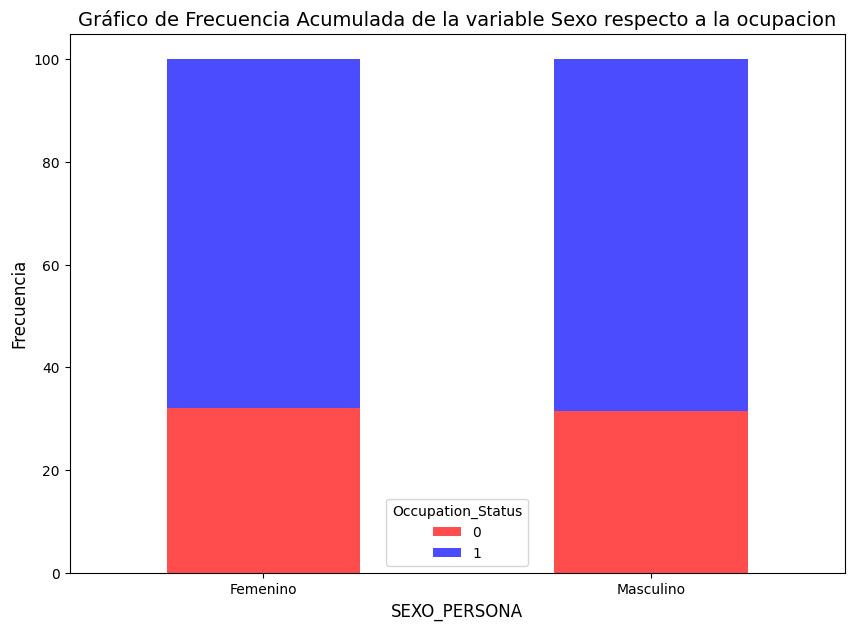

In [336]:
grafico_frecuencia_acumulada(data=data_analisis, categorical='SEXO_PERSONA', target='Occupation_Status', 
                             title = 'Gráfico de Frecuencia Acumulada de la variable Sexo respecto a la ocupacion', colors=['#FF0000','#0000FF'])

In [337]:
from data_module.pruebas import calculate_woe_iv

In [338]:
iv_df = pd.DataFrame(columns=['IV'])

# Calculate WOE and IV for each variable in the categorical dataframe
for column in categorical.columns:
    if column != 'Occupation_Status':
        woe, iv = calculate_woe_iv(categorical, column, 'Occupation_Status')
        sum_iv = sum([i for i in iv.values()])
        iv_df.loc[column, 'IV'] = sum_iv

# Display the resulting dataframe
print("Resultados del Cálculo de IV")
display(iv_df.sort_values(by='IV', ascending=False))

print("Variables con IV mayor a 0.02, es decir, predictores aceptables")
display(iv_df[iv_df['IV'] > 0.02].sort_values(by='IV', ascending=False))
iv_columns = list(iv_df[iv_df['IV'] > 0.02].index)

Resultados del Cálculo de IV


,IV
ZONA,0.110287
VIVE_COMUNIDAD_CAMPESINA,0.089632
RECOLECCION_DE_BASURAS,0.077287
DPTO,0.072584
ES_CAMPESINO,0.048288
TIPO_DE_VIVIENDA,0.0363
ALCANTARILLADO,0.031306
ACUEDUCTO,0.019394
MAYOR_NIVEL_EDUCATIVO_ALCANZADO,0.016082
GAS_NATURAL,0.010213


Variables con IV mayor a 0.02, es decir, predictores aceptables


,IV
ZONA,0.110287
VIVE_COMUNIDAD_CAMPESINA,0.089632
RECOLECCION_DE_BASURAS,0.077287
DPTO,0.072584
ES_CAMPESINO,0.048288
TIPO_DE_VIVIENDA,0.0363
ALCANTARILLADO,0.031306


In [339]:
from data_module.pruebas import chi2_test_of_normality

In [340]:
chi2_test_of_normality(categorical, var1='SEXO_PERSONA', var2='Occupation_Status')

0.05066454814297772

In [341]:
def calculate_p_values(columns, dataframe):
    p_values = np.zeros((len(columns), len(columns)))
    
    for i in range(len(columns)):
        for j in range(len(columns)):
            if i != j:
                var1 = columns[i]
                var2 = columns[j]
                p_value = chi2_test_of_normality(dataframe, var1, var2)
                p_values[i, j] = p_value
    
    p_values_df = pd.DataFrame(p_values, index=columns, columns=columns)
    return p_values_df

p_values_matrix = calculate_p_values(iv_columns, data_analisis)


In [342]:
p_values_matrix

,ES_CAMPESINO,VIVE_COMUNIDAD_CAMPESINA,TIPO_DE_VIVIENDA,ALCANTARILLADO,RECOLECCION_DE_BASURAS,DPTO,ZONA
ES_CAMPESINO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VIVE_COMUNIDAD_CAMPESINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TIPO_DE_VIVIENDA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALCANTARILLADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RECOLECCION_DE_BASURAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DPTO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [343]:
display(pd.crosstab(data_analisis['ES_CAMPESINO'], data_analisis['TIPO_DE_VIVIENDA']))
from scipy.stats import chi2_contingency

display(chi2_contingency(pd.crosstab(data_analisis['ZONA'], data_analisis['ES_CAMPESINO'])))

TIPO_DE_VIVIENDA,Apartamento,Casa,Cuarto (s) en inquilinato,Cuarto (s) en otro tipo de estructura,"Otra vivienda (carpa, vagón, embarcación, cueva, refugio natural, etc.)",Vivienda indígena
ES_CAMPESINO,,,,,,
No,42821,42603,1362,256,23,250
No informa,105,136,3,0,0,2
Si,7252,18120,519,139,11,511


Chi2ContingencyResult(statistic=26598.931643181135, pvalue=0.0, dof=2, expected_freq=array([[7.74803651e+04, 2.18292044e+02, 2.35613429e+04],
       [9.83463492e+03, 2.77079561e+01, 2.99065712e+03]]))

In [344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical.drop(columns='Occupation_Status'))

# Create the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(categorical_encoded, categorical['Occupation_Status'])

# Calculate feature importance
feature_importance = tree.feature_importances_

In [345]:
# Create a dataframe to store the feature importance
feature_importance_df = pd.DataFrame({'Variable': encoder.get_feature_names_out(categorical.drop(columns='Occupation_Status').columns),
                                      'Feature Importance': feature_importance})

# Display the dataframe
display(feature_importance_df.sort_values(by='Feature Importance', ascending=False)[:10])

,Variable,Feature Importance
111,ZONA_Resto,0.036641
48,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Media académic...,0.030923
19,PADRE_RESIDE_HOGAR_No,0.027760
5,PARENTESCO_Jefe del Hogar,0.026871
41,SE_ENCUENTRA_ESTUDIANDO_No,0.026736
44,MAYOR_NIVEL_EDUCATIVO_ALCANZADO_Básica secunda...,0.025308
16,MADRE_RESIDE_HOGAR_No,0.025025
35,ESTADO_CIVIL_Esta soltero (a),0.024771
42,SE_ENCUENTRA_ESTUDIANDO_Si,0.024268
18,PADRE_RESIDE_HOGAR_Fallecido,0.023331


In [346]:
feature_importance_df['VAR'] = feature_importance_df['Variable'].apply(lambda x: '_'.join(x.split('_')[:-1]))

In [347]:
result_fi = feature_importance_df.groupby('VAR')['Feature Importance'].mean().sort_values(ascending=False)


In [348]:
result_fi

VAR
SE_ENCUENTRA_ESTUDIANDO            0.025502
PADRE_RESIDE_HOGAR                 0.023949
MADRE_RESIDE_HOGAR                 0.020915
SEXO_PERSONA                       0.018887
ZONA                               0.018320
ES_CAMPESINO                       0.015173
ESTADO_CIVIL                       0.014639
GAS_NATURAL                        0.012231
MAYOR_NIVEL_EDUCATIVO_ALCANZADO    0.011096
PARENTESCO                         0.010308
IDENTIDAD_GENERO                   0.009429
ACUEDUCTO                          0.007944
ALCANTARILLADO                     0.007743
ETNIA                              0.005802
RECOLECCION_DE_BASURAS             0.005458
TIPO_DE_VIVIENDA                   0.004408
DPTO                               0.004141
VIVE_COMUNIDAD_CAMPESINA           0.003084
SABE_LEER_Y_ESCRIBIR               0.002057
ENERGIA_ELECTRICA                  0.000773
Name: Feature Importance, dtype: float64

In [349]:
fi_columns = list(result_fi[:7].index)

In [350]:
categorical_columns = list(set(fi_columns).union(set(iv_columns)))

# Exploración y Selección de variables cuantitativas

In [351]:
numeric = data_analisis.select_dtypes(include='number').columns
numerical = data_analisis[list(numeric)]
numerical.head()

,EDAD,ESTRATO_TARIFA_ENERGIA_ELECTRICA,NUM_PERSONAS_HOGAR,Occupation_Status
0,27,2.0,3,0
1,18,1.0,5,0
2,25,1.0,2,0
3,28,1.0,3,0
4,27,1.0,6,0


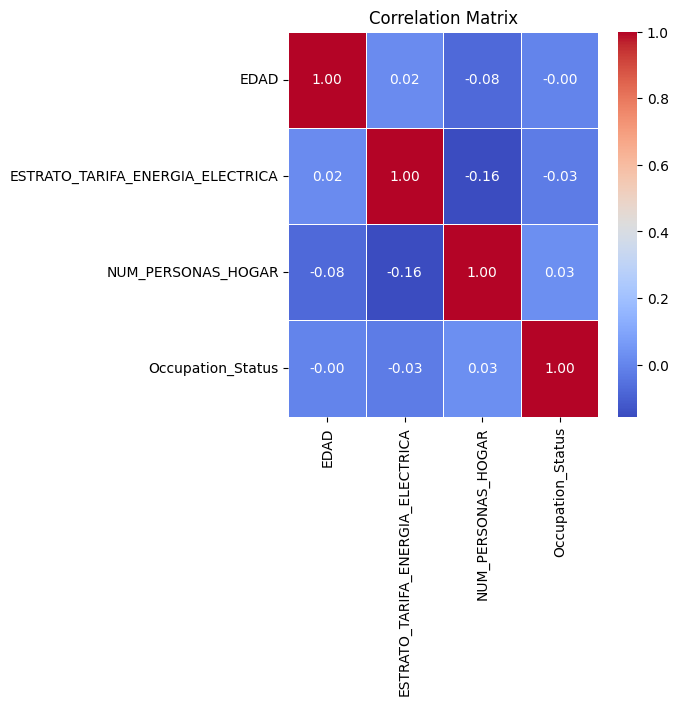

In [352]:
# Calculate the correlation matrix
correlation_matrix = numerical.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [353]:
from sklearn.feature_selection import SelectKBest, f_classif

seleccion = SelectKBest(f_classif, k='all').fit(numerical.fillna(0), categorical['Occupation_Status'])


c:\Users\andre\OneDrive\Documentos\Encuesta Integrada de Hogares\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [354]:
display(seleccion.scores_)
display(seleccion.get_feature_names_out())


array([  0.92995286, 123.06588641,  74.31774688,          inf])

array(['EDAD', 'ESTRATO_TARIFA_ENERGIA_ELECTRICA', 'NUM_PERSONAS_HOGAR',
       'Occupation_Status'], dtype=object)

In [355]:
numeric_columns = ['ESTRATO_TARIFA_ENERGIA_ELECTRICA', 'NUM_PERSONAS_HOGAR']
target = 'Occupation_Status'

In [356]:
final_columns = categorical_columns + numeric_columns

In [370]:
X = data_analisis[final_columns]
y = data_analisis[target]

In [371]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y, shuffle=True)

In [390]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer= Pipeline (steps=[
('imputer', SimpleImputer(strategy='mean') ),
('scaler', StandardScaler())
])

categorical_transformer_num= Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [391]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
     ('numeric', numerical_transformer, numeric_columns), # Auí para cada uno definimos el nombre del proceso, el proceso y en donde vamos a aplicarlo (Columnas)
     ('categ', categorical_transformer_num, categorical_columns),
    ]
)


In [392]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_preprocessed_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

In [393]:
# Regresíon Logística
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=100)
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Arbol de Decisión
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 10),
    'criterion': ['gini', 'entropy']
}

# RandomForest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=42)
forest_params = {
    'n_estimators': range(100,600,100),
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 10),
    'criterion': ['gini', 'entropy']
}

In [394]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\andre\OneDrive\Documentos\Encuesta Integrada de Hogares\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1}

0.5784037936023146

              precision    recall  f1-score   support

           0       0.38      0.60      0.46      7270
           1       0.74      0.55      0.63     15553

    accuracy                           0.56     22823
   macro avg       0.56      0.57      0.55     22823
weighted avg       0.63      0.56      0.58     22823



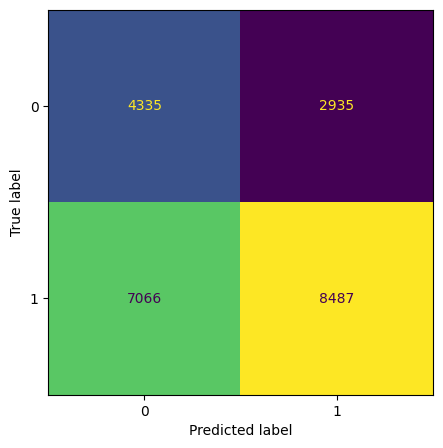

In [395]:
# Evaluación modelo logístico

modelo = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
modelo.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo.best_params_)
display(modelo.best_score_)

y_pred = modelo.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.show()

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 8}

0.598995338370037

              precision    recall  f1-score   support

           0       0.40      0.30      0.34      7270
           1       0.71      0.79      0.74     15553

    accuracy                           0.63     22823
   macro avg       0.55      0.54      0.54     22823
weighted avg       0.61      0.63      0.62     22823



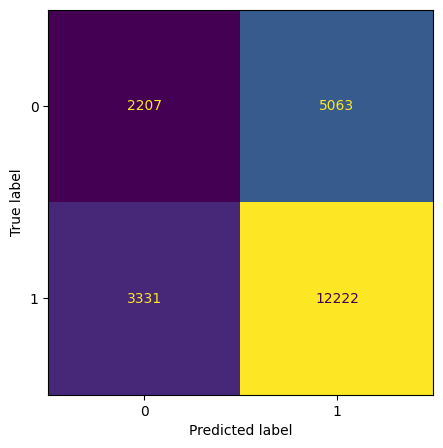

In [396]:
# Evaluación modelo árbol de decisión

modelo = GridSearchCV(tree_model, tree_params, cv=5, scoring='accuracy', verbose=1)
modelo.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo.best_params_)
display(modelo.best_score_)

y_pred = modelo.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.show()

In [397]:
# Evaluación modelo Random Forest

modelo = GridSearchCV(forest_model, forest_params, cv=5, scoring='accuracy', verbose=1)
modelo.fit(X_train_preprocessed_smote, y_train_smote)
display(modelo.best_params_)
display(modelo.best_score_)
y_pred = modelo.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
plt.show()


Fitting 5 folds for each of 1040 candidates, totalling 5200 fits
